In [ ]:
"iwf-competition-analysis-visualizations"
"""Questions:
What is the average body weight for men and women?
What is the average weight of successful Max Snatch, 
    Max C/J, and Total for IWF, Oly, and all for men and women?
What is ratio of missed lifts to completed lifts 
    for Oly, IWF, and all for men and women?
What are the top 10 most popular country codes?
What is the ratio of female to male competitors for Oly, IWF, and all?
Is the number of female competitors increasing? 
Is there a correlation between body weight and 
    max snatch, max c/j, and total for men and women?
    
Comparison of max snatch, max c/j, and totals for 
    weight classes by 5kg increments for men and women. 
    




Need to clean up country codes? Perhaps using regular expressions?"""

In [ ]:
# # A function to concate all of the above .csv files into one file
# file_name = "Olympic-Weightlifting-total-results-1980-2016"
# wf.datatable_cleanup.concat_csv(file_name)

# import os
# from glob import glob
# import pandas as pd
# import webscraping_functions as wf

In [2]:
from datetime import datetime
import pandas as pd
import webscraping_functions as wf
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline


# #plt.show()

[NbConvertApp] Converting notebook webscraping_functions.ipynb to script
[NbConvertApp] Writing 14750 bytes to webscraping_functions.py


In [ ]:
# Setting custom color palette from hex color codes 
"""
Hexcodes and Color Names
"#B38867", # Coffee
"#283655", # Blueberry
"#69983D", # Green Apple
"#D50000", # Guardsman Red
"#A57298", # Boquet
"#FFAA00", # Web Orange/Goldenrod
"#F18D93", # Pink Tulip
"#F0810F", # Tangerine
"#66A5AD", # Ocean
"""

color_names = "coffee, blueberry, green, red, boquet, goldenrod, pink tulip, tangerine, ocean".split(", ")
hexcodes = "#B38867 #283655 #69983D #D50000 #A57298 #FFAA00 #F18D93 #F0810F #66A5AD".split()
colors_codes = list(zip(color_names, hexcodes))
exercise_names = "Deadlift BackSquat OverheadSquat FrontSquat BenchPress ShoulderPress SnatchPress Snatch Clean&Jerk".split()
color_map= dict(zip(exercise_names, colors_codes))
color_df = pd.DataFrame.from_dict(color_map, orient="index", columns=["Color Name", "Hexcode"])
colors = color_df["Hexcode"].tolist()
palette = sns.set_palette(sns.color_palette(colors))
sns.set_context("paper")

In [3]:
df = pd.read_csv("iwf-oly-weightlifting-combined-total-results-1980-2016.csv", encoding='utf-8')

In [4]:
df.drop(columns =["Unnamed: 0"], inplace = True)
df["Body Weight (kg)"] = wf.ResultsCleanup.string_to_float(df["Body Weight (kg)"].values.tolist())
df["Snatch 1 (kg)"] = wf.ResultsCleanup.string_to_float(df["Snatch 1 (kg)"].values.tolist())
df["Snatch 2 (kg)"] = wf.ResultsCleanup.string_to_float(df["Snatch 2 (kg)"].values.tolist())
df["Snatch 3 (kg)"] = wf.ResultsCleanup.string_to_float(df["Snatch 3 (kg)"].values.tolist())
df["C/J 1 (kg)"] = wf.ResultsCleanup.string_to_float(df["C/J 1 (kg)"].values.tolist())
df["C/J 2 (kg)"] = wf.ResultsCleanup.string_to_float(df["C/J 2 (kg)"].values.tolist())
df["C/J 3 (kg)"] = wf.ResultsCleanup.string_to_float(df["C/J 3 (kg)"].values.tolist())
df["Max Snatch"] = wf.ResultsCleanup.string_to_float(df["Max Snatch"].values.tolist())
df["Max C/J"] = wf.ResultsCleanup.string_to_float(df["Max C/J"].values.tolist())
df["Total"] = wf.ResultsCleanup.string_to_float(df["Total"].values.tolist())
df["Nationality"] = df["Nationality"].str.strip(")")
# wf.CheckFunctions.change_nation_code(df)
df = wf.datatable_cleanup.country_code_cleanup(df)
df.fillna(0, inplace=True)
df.head()

C:\Users\jacqu\Desktop\Github Portfolio\olympic-weightlifting-results\webscraping_functions.py:299: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dataframe["Nationality"][iso_dataframe_index] = iso_code
C:\Users\jacqu\Desktop\Github Portfolio\olympic-weightlifting-results\webscraping_functions.py:304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dataframe["Nationality"][ioc_dataframe_index] = ioc_code


,Year,Event,Gender,Comp Rank,Athlete Name,Nationality,Group,Body Weight (kg),Snatch 1 (kg),Snatch 2 (kg),Snatch 3 (kg),Max Snatch,Snatch Rank,C/J 1 (kg),C/J 2 (kg),C/J 3 (kg),Max C/J,C/J Rank,Total
0,1996,iwf,W,1.0,Wan Ni,CHN,A,84.40,102.5,-107.5,-110.0,102.5,2,130.0,135.0,137.5,137.5,1,240.0
1,1996,iwf,W,2.0,Karoliina Lundahl,FIN,A,83.10,100.0,105.0,107.5,107.5,1,125.0,-127.5,-127.5,125.0,3,232.5
2,1996,iwf,W,3.0,Chen Hsiao-lien,TPE,A,100.40,-95.0,-97.5,97.5,97.5,4,130.0,-137.5,-137.5,130.0,2,227.5
3,1996,iwf,W,4.0,Sylvie Iskin,FRA,A,96.85,-100.0,100.0,102.5,102.5,2,117.5,-122.5,122.5,122.5,4,225.0
4,1996,iwf,W,5.0,Erika TakÃƒÂ¡cs,HUN,A,96.00,97.5,-100.0,-100.0,97.5,4,120.0,-125.0,-125.0,120.0,5,217.5


In [5]:
df[::-1].head()

,Year,Event,Gender,Comp Rank,Athlete Name,Nationality,Group,Body Weight (kg),Snatch 1 (kg),Snatch 2 (kg),Snatch 3 (kg),Max Snatch,Snatch Rank,C/J 1 (kg),C/J 2 (kg),C/J 3 (kg),Max C/J,C/J Rank,Total
10198,2016,oly,W,0.0,Jaqueline Ferreira,BRA,A,74.89,-103.0,-103.0,-103.0,-103.0,15,0.0,0.0,0.0,0.0,15,0.0
10197,2016,oly,W,14.0,Samira Ouass,MAR,B,73.68,70.0,75.0,-80.0,75.0,14,90.0,-96.0,97.0,97.0,14,172.0
10196,2016,oly,W,13.0,Assiya Ã„Â°pek,TUR,B,69.77,80.0,83.0,-85.0,83.0,13,95.0,100.0,103.0,103.0,13,186.0
10195,2016,oly,W,12.0,Natalia PriÃˆâ„¢cepa,MDA,B,73.72,93.0,97.0,-100.0,97.0,11,110.0,116.0,-123.0,116.0,12,213.0
10194,2016,oly,W,11.0,Mary Opeloge,WSM,B,74.56,97.0,100.0,-102.0,100.0,9,115.0,117.0,118.0,118.0,11,218.0


In [6]:
df["Nationality"].nunique()

176

In [7]:
df["Nationality"].value_counts().head(10)

CHN    361
JPN    307
RUS    305
USA    300
POL    285
COL    273
KOR    263
TUR    260
TPE    249
UKR    237
Name: Nationality, dtype: int64

In [8]:
df_men = df[df["Gender"] == "M"]
df_men.head()

,Year,Event,Gender,Comp Rank,Athlete Name,Nationality,Group,Body Weight (kg),Snatch 1 (kg),Snatch 2 (kg),Snatch 3 (kg),Max Snatch,Snatch Rank,C/J 1 (kg),C/J 2 (kg),C/J 3 (kg),Max C/J,C/J Rank,Total
102,1997,iwf,M,1.0,Andrey Chemerkin,RUS,A,170.30,185.0,195.0,200.0,200.0,1,240.0,250.0,262.5,262.5,1,462.5
103,1997,iwf,M,2.0,Ronny Weller,GER,A,138.40,195.0,200.0,-205.5,200.0,1,242.5,250.0,-262.5,250.0,2,450.0
104,1997,iwf,M,3.0,Viktors Ã…Â Ã„ï¿½erbatihs,LAT,A,118.45,182.5,187.5,-190.0,187.5,3,220.0,225.0,-240.0,225.0,3,412.5
105,1997,iwf,M,4.0,Tibor Stark,HUN,A,134.65,180.0,185.0,-190.0,185.0,4,215.0,220.0,-225.0,220.0,6,405.0
106,1997,iwf,M,5.0,Anders BergstrÃƒÂ¶m,SWE,A,130.20,-175.0,175.0,-180.0,175.0,6,220.0,225.0,-232.5,225.0,3,400.0


In [38]:
df_men[df_men["Body Weight (kg)"] > 0].head()

,Year,Event,Gender,Comp Rank,Athlete Name,Nationality,Group,Body Weight (kg),Snatch 1 (kg),Snatch 2 (kg),Snatch 3 (kg),Max Snatch,Snatch Rank,C/J 1 (kg),C/J 2 (kg),C/J 3 (kg),Max C/J,C/J Rank,Total
102,1997,iwf,M,1.0,Andrey Chemerkin,RUS,A,170.30,185.0,195.0,200.0,200.0,1,240.0,250.0,262.5,262.5,1,462.5
103,1997,iwf,M,2.0,Ronny Weller,GER,A,138.40,195.0,200.0,-205.5,200.0,1,242.5,250.0,-262.5,250.0,2,450.0
104,1997,iwf,M,3.0,Viktors Ã…Â Ã„ï¿½erbatihs,LAT,A,118.45,182.5,187.5,-190.0,187.5,3,220.0,225.0,-240.0,225.0,3,412.5
105,1997,iwf,M,4.0,Tibor Stark,HUN,A,134.65,180.0,185.0,-190.0,185.0,4,215.0,220.0,-225.0,220.0,6,405.0
106,1997,iwf,M,5.0,Anders BergstrÃƒÂ¶m,SWE,A,130.20,-175.0,175.0,-180.0,175.0,6,220.0,225.0,-232.5,225.0,3,400.0


In [9]:
df_women = df[df["Gender"] == "W"]
df_women.head()

,Year,Event,Gender,Comp Rank,Athlete Name,Nationality,Group,Body Weight (kg),Snatch 1 (kg),Snatch 2 (kg),Snatch 3 (kg),Max Snatch,Snatch Rank,C/J 1 (kg),C/J 2 (kg),C/J 3 (kg),Max C/J,C/J Rank,Total
0,1996,iwf,W,1.0,Wan Ni,CHN,A,84.40,102.5,-107.5,-110.0,102.5,2,130.0,135.0,137.5,137.5,1,240.0
1,1996,iwf,W,2.0,Karoliina Lundahl,FIN,A,83.10,100.0,105.0,107.5,107.5,1,125.0,-127.5,-127.5,125.0,3,232.5
2,1996,iwf,W,3.0,Chen Hsiao-lien,TPE,A,100.40,-95.0,-97.5,97.5,97.5,4,130.0,-137.5,-137.5,130.0,2,227.5
3,1996,iwf,W,4.0,Sylvie Iskin,FRA,A,96.85,-100.0,100.0,102.5,102.5,2,117.5,-122.5,122.5,122.5,4,225.0
4,1996,iwf,W,5.0,Erika TakÃƒÂ¡cs,HUN,A,96.00,97.5,-100.0,-100.0,97.5,4,120.0,-125.0,-125.0,120.0,5,217.5


In [10]:
df_oly = df[df["Event"] == "oly"]
df_oly.head()

,Year,Event,Gender,Comp Rank,Athlete Name,Nationality,Group,Body Weight (kg),Snatch 1 (kg),Snatch 2 (kg),Snatch 3 (kg),Max Snatch,Snatch Rank,C/J 1 (kg),C/J 2 (kg),C/J 3 (kg),Max C/J,C/J Rank,Total
8044,1980,oly,M,1.0,Sultan Rakhmanov,URS,A,145.25,185.0,190.0,195.0,195.0,1,230.0,237.5,245.0,245.0,1,440.0
8045,1980,oly,M,2.0,JÃƒÂ¼rgen Heuser,GDR,A,133.95,-182.5,182.5,-187.5,182.5,2,-227.5,227.5,-242.5,227.5,2,410.0
8046,1980,oly,M,3.0,Tadeusz Rutkowski,POL,A,124.90,175.0,180.0,-182.5,180.0,4,222.5,227.5,-230.0,227.5,2,407.5
8047,1980,oly,M,4.0,Rudolf StrejÃ„ï¿½ek,TCH,A,133.10,182.5,-187.5,-187.5,182.5,2,220.0,-225.0,-225.0,220.0,4,402.5
8048,1980,oly,M,5.0,Bohuslav Braum,TCH,A,148.45,-180.0,-180.0,180.0,180.0,4,212.5,217.5,-222.5,217.5,6,397.5


In [11]:
df_iwf = df[df["Event"] == "iwf"]
df_iwf.head()

,Year,Event,Gender,Comp Rank,Athlete Name,Nationality,Group,Body Weight (kg),Snatch 1 (kg),Snatch 2 (kg),Snatch 3 (kg),Max Snatch,Snatch Rank,C/J 1 (kg),C/J 2 (kg),C/J 3 (kg),Max C/J,C/J Rank,Total
0,1996,iwf,W,1.0,Wan Ni,CHN,A,84.40,102.5,-107.5,-110.0,102.5,2,130.0,135.0,137.5,137.5,1,240.0
1,1996,iwf,W,2.0,Karoliina Lundahl,FIN,A,83.10,100.0,105.0,107.5,107.5,1,125.0,-127.5,-127.5,125.0,3,232.5
2,1996,iwf,W,3.0,Chen Hsiao-lien,TPE,A,100.40,-95.0,-97.5,97.5,97.5,4,130.0,-137.5,-137.5,130.0,2,227.5
3,1996,iwf,W,4.0,Sylvie Iskin,FRA,A,96.85,-100.0,100.0,102.5,102.5,2,117.5,-122.5,122.5,122.5,4,225.0
4,1996,iwf,W,5.0,Erika TakÃƒÂ¡cs,HUN,A,96.00,97.5,-100.0,-100.0,97.5,4,120.0,-125.0,-125.0,120.0,5,217.5


In [28]:
df[["Body Weight (kg)", "Max Snatch"]].corr()

,Body Weight (kg),Max Snatch
Body Weight (kg),1.00000,0.19071
Max Snatch,0.19071,1.00000


In [29]:
df[["Body Weight (kg)", "Max C/J"]].corr()

,Body Weight (kg),Max C/J
Body Weight (kg),1.000000,0.158796
Max C/J,0.158796,1.000000


In [30]:
df[["Body Weight (kg)", "Total"]].corr()

,Body Weight (kg),Total
Body Weight (kg),1.000000,0.200243
Total,0.200243,1.000000


In [31]:
df[["Max Snatch", "Max C/J"]].corr()

,Max Snatch,Max C/J
Max Snatch,1.000000,0.392043
Max C/J,0.392043,1.000000


In [ ]:
sns.hist(

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


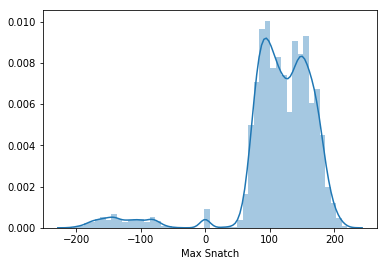

In [24]:
sns.distplot(df["Max Snatch"])

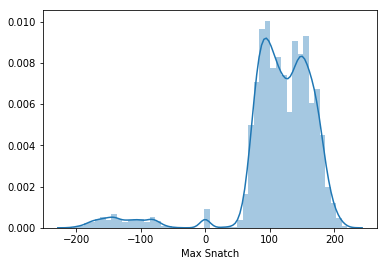

In [40]:
sns.distplot(df["Max Snatch"])

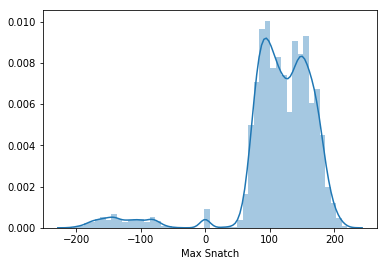

In [27]:
df.dropna(subset=["Max Snatch"])
sns.distplot(df["Max Snatch"])

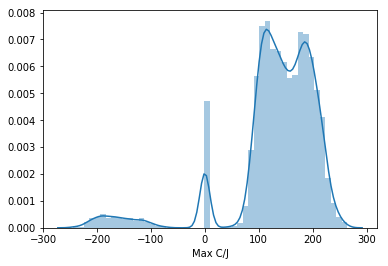

In [13]:
sns.distplot(df["Max C/J"])

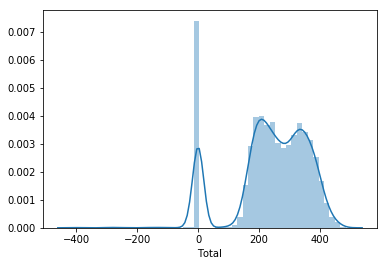

In [25]:
sns.distplot(df["Total"])

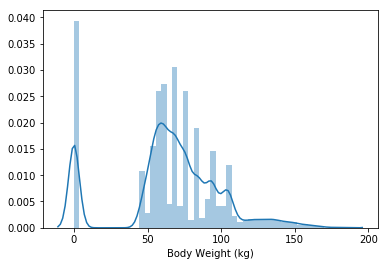

In [15]:
sns.distplot(df["Body Weight (kg)"])

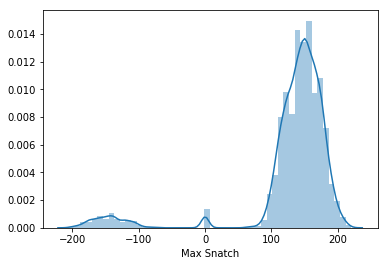

In [16]:
sns.distplot(df_men["Max Snatch"])

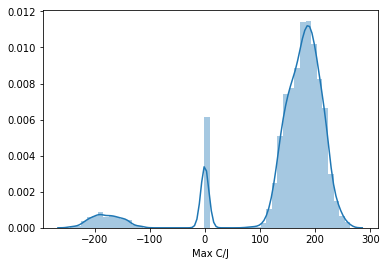

In [17]:
sns.distplot(df_men["Max C/J"])

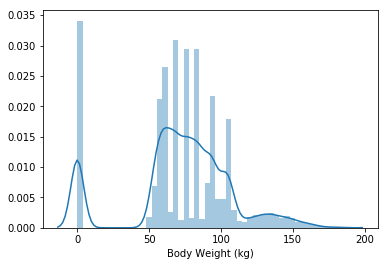

In [18]:
sns.distplot(df_men["Body Weight (kg)"])

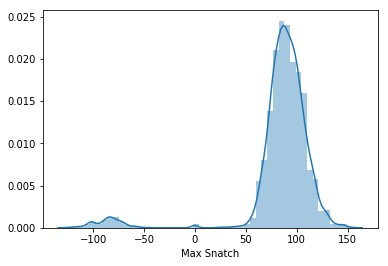

In [19]:
sns.distplot(df_women["Max Snatch"])

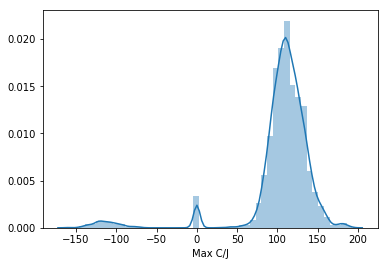

In [20]:
sns.distplot(df_women["Max C/J"])

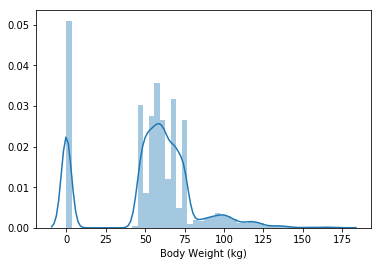

In [21]:
sns.distplot(df_women["Body Weight (kg)"])

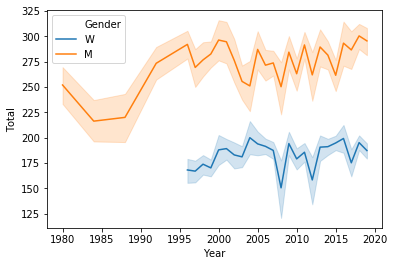

In [33]:
sns.lineplot(x="Year", y="Total", data=df, hue="Gender")

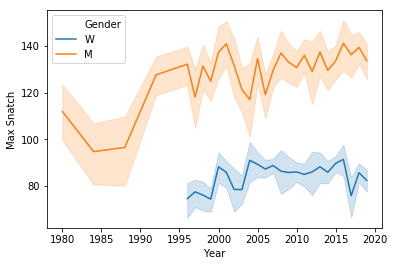

In [34]:
sns.lineplot(x="Year", y="Max Snatch", data=df, hue="Gender")

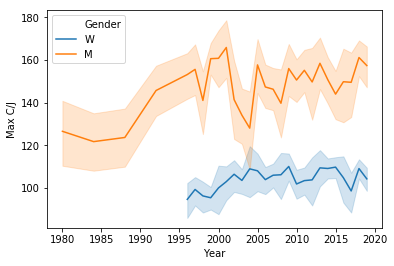

In [35]:
sns.lineplot(x="Year", y="Max C/J", data=df, hue="Gender")

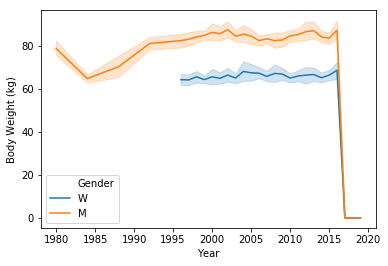

In [36]:
sns.lineplot(x="Year", y="Body Weight (kg)", data=df, hue="Gender")

In [ ]:
# This changes the "%Y-%m-%d %H:%M:%S" string format in the list to datetime format "%Y-%m-%d %H:%M:%S" 
# to be able to use seaborn graphs below.
for i in range(len(workout_data_list)):
    try:
        temp = datetime.strptime(workout_data_list[i][4], "%Y-%m-%d %H:%M:%S")
        temp.strftime("%Y-%m-%d %H:%M:%S")
        workout_data_list[i][4] = temp
    except:
        pass

In [ ]:
workout_data = pd.DataFrame(workout_data_list)
workout_data.head()

In [ ]:
workout_data.columns = "exercise, sets, reps, weight_lbs, datetime, duration_minutes".split(", ")
workout_data.head()

In [ ]:
# A dataframe for total count of workouts for each exercise
workout_count = workout_data[["exercise", "datetime"]]
workout_count.head()

In [ ]:
# Plot for total count of workouts for each exercise
plt.figure(figsize = (12,9))
sns.set_context("paper", font_scale = 2)
graph = sns.swarmplot(
    x="exercise", 
    y="datetime", 
    data=workout_count, 
    palette=colors, 
    order=exercise_names
    )
graph.set_xticklabels(graph.get_xticklabels(), rotation = 30)
graph.yaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
graph.yaxis.set_major_formatter(mdates.DateFormatter("%b %d, %y"))
graph.set(
    title="Workout Count per Exercise", 
    xlabel="Exercise", 
    ylabel="Date"
    )
plt.savefig("Workout Count per Exercise.png")

In [ ]:
# A dataframe for max weight by each exercise. 
exercise_max = workout_data[["exercise", "weight_lbs"]].groupby("exercise").max()
exercise_max["exercise"] = exercise_max.index
exercise_max

In [ ]:
# Plot of max weight for each exercise
plt.figure(figsize = (12,9))
sns.set_context("paper", font_scale = 2)
graph = sns.barplot(
    x="exercise", 
    y="weight_lbs", 
    data=exercise_max, 
    order=exercise_names
    )
graph.set_xticklabels(graph.get_xticklabels(), rotation = 30)
graph.set(
    title="Max Lifts per Exercise", 
    xlabel="Exercise", 
    ylabel="Weight (lbs)", 
    yticks=np.arange(0, 300, 25)
    )
plt.savefig("Max Lifts per Exercise.png")

In [ ]:
# A dataframe for total intensity(total weight lifted) for each exercise
total_intensity = workout_data[["exercise", "weight_lbs"]].groupby("exercise").sum()
total_intensity["exercise"] = total_intensity.index
total_intensity

In [ ]:
# Plot of total intensity for each exercise
plt.figure(figsize = (12,9))
sns.set_context("paper", font_scale = 2)
graph = sns.barplot(
    x="exercise", 
    y="weight_lbs", 
    data=total_intensity, 
    order=exercise_names
    )
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
graph.set(
    title="Total Intensity", 
    xlabel="Exercise", 
    ylabel="Total Weight Lifted (lbs)", 
    yticks=np.arange(0, 8000, 500)
    )
plt.savefig("Total Intensity.png")

In [ ]:
# A dataframe for total volume for each exercise
total_reps = workout_data["sets"]*workout_data["reps"]
workout_data["total volume"] = total_reps
total_volume = workout_data[["exercise", "total volume"]].groupby("exercise").sum()
total_volume["exercise"] = total_volume.index
total_volume

In [ ]:
# Plot for total volume for each exercise
plt.figure(figsize = (12,9))
sns.set_context("paper", font_scale = 2)
graph = sns.barplot(
    x="exercise", 
    y="total volume", 
    data=total_volume, 
    order=exercise_names
    )
graph.set_xticklabels(graph.get_xticklabels(), rotation = 30)
graph.set(
    title="Total Volume per Exercise", 
    xlabel="Exercise", 
    ylabel="Total Reps", 
    yticks=np.arange(0, 1200, 100)
    )
plt.savefig("Total Volume.png")

In [ ]:
squats_intensity = workout_data[
    ["exercise", "datetime", "weight_lbs"]
    ].loc[
    (workout_data["exercise"] == "BackSquat") | 
    (workout_data["exercise"] == "OverheadSquat") | 
    (workout_data["exercise"] == "FrontSquat")
    ]
squats_intensity.head()

In [ ]:
squats_volume = workout_data[
    ["exercise", "datetime", "total volume"]
    ].loc[
    (workout_data["exercise"] == "BackSquat") | 
    (workout_data["exercise"] == "OverheadSquat") | 
    (workout_data["exercise"] == "FrontSquat")
    ]
squats_volume.head()

In [ ]:
presses_intensity = workout_data[
    ["exercise", "datetime", "weight_lbs"]
    ].loc[(workout_data["exercise"] == "BenchPress") | 
    (workout_data["exercise"] == "ShoulderPress")]
presses_intensity.head()

In [ ]:
presses_volume = workout_data[
    ["exercise", "datetime", "total volume"]
    ].loc[(workout_data["exercise"] == "BenchPress") | 
    (workout_data["exercise"] == "ShoulderPress")
    ]
presses_volume.head()

In [ ]:
oly_lifts_intensity = workout_data[
    ["exercise", "datetime", "weight_lbs"]
    ].loc[
    (workout_data["exercise"] == "Clean&Jerk") | 
    (workout_data["exercise"] == "Snatch")
    ]
oly_lifts_intensity.head()

In [ ]:
oly_lifts_volume = workout_data[
    ["exercise", "datetime", "total volume"]
    ].loc[(workout_data["exercise"] == "Clean&Jerk") | 
    (workout_data["exercise"] == "Snatch")
    ]
oly_lifts_volume.head()

In [ ]:
# Plot comparison for intensity for squats.
plt.figure(figsize = (16,9))

sns.set_context("paper", font_scale = 2)
graph = sns.lineplot(
    x="datetime", 
    y="weight_lbs", 
    data=squats_intensity, 
    palette=colors[1:4], 
    hue="exercise", 
    linewidth=3
    )
graph.set_xticklabels(squats_intensity["datetime"].values, rotation = 30)
graph.xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
graph.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d/%y"))
graph.set(
    title="Squats Intensity vs. Time", 
    xlabel="Time", 
    ylabel="Weight (lbs)", 
    yticks=np.arange(0, 250, 25)
    )
plt.legend(
    title="Exercise", 
    loc="upper right", 
    labels=squats_intensity["exercise"].unique()
    )
plt.savefig("Squats Intensity.png")

In [ ]:
# Plot comparison for intensity for squats.
plt.figure(figsize = (16,9))

sns.set_context("paper", font_scale = 2)
graph = sns.lineplot(
    x="datetime", 
    y="total volume", 
    data=squats_volume, 
    palette=colors[1:4], 
    hue="exercise", 
    linewidth=3
    )
graph.set_xticklabels(squats_volume["datetime"].values, rotation = 30)
graph.xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
graph.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d/%y"))
graph.set(
    title="Squats Volume vs. Time", 
    xlabel="Time", 
    ylabel="Total Reps per Session", 
    yticks=np.arange(0, 55, 5)
    )
plt.legend(
    title="Exercise", 
    loc="upper left", 
    labels=squats_volume["exercise"].unique()
    )
plt.savefig("Squats Volume.png")

In [ ]:
# Plot comparison for intensity for squats.
plt.figure(figsize = (16,9))

sns.set_context("paper", font_scale = 2)
graph = sns.lineplot(
    x="datetime", 
    y="weight_lbs", 
    data=presses_intensity, 
    palette=colors[4:6], 
    hue="exercise", 
    linewidth=3
    )
graph.set_xticklabels(presses_intensity["datetime"].values, rotation = 30)
graph.xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
graph.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d/%y"))
graph.set(
    title="Presses Intensity vs. Time", 
    xlabel="Time", 
    ylabel="Weight (lbs)", 
    yticks=np.arange(0, 200, 25)
    )
plt.legend(
    title="Exercise", 
    loc="upper right", 
    labels=presses_intensity["exercise"].unique()
    )
plt.savefig("Presses Intensity.png")

In [ ]:
# Plot comparison for intensity for squats.
plt.figure(figsize = (16,9))

sns.set_context("paper", font_scale = 2)
graph = sns.lineplot(
    x="datetime", 
    y="total volume", 
    data=presses_volume, 
    palette=colors[4:6], 
    hue="exercise", 
    linewidth=3
    )
graph.set_xticklabels(presses_volume["datetime"].values, rotation = 30)
graph.xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
graph.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d/%y"))
graph.set(
    title="Presses Volume vs. Time", 
    xlabel="Time", 
    ylabel="Total Reps per Session", 
    yticks=np.arange(0, 55, 5)
    )
plt.legend(
    title="Exercise", 
    loc="upper left", 
    labels=presses_volume["exercise"].unique()
    )
plt.savefig("Presses Volume.png")

In [ ]:
# Plot comparison for intensity for squats.
plt.figure(figsize = (16,9))

sns.set_context("paper", font_scale = 2)
graph = sns.lineplot(
    x="datetime", 
    y="weight_lbs", 
    data=oly_lifts_intensity, 
    palette=colors[7:9], 
    hue="exercise", 
    linewidth=3
    )
graph.set_xticklabels(oly_lifts_intensity["datetime"].values, rotation = 30)
graph.xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
graph.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d/%y"))
graph.set(
    title="Olympic Lifts Intensity vs. Time", 
    xlabel="Time", 
    ylabel="Weight (lbs)",
    yticks=np.arange(0, 150, 25)
    )
plt.legend(
    title="Exercise", 
    loc="upper right", 
    labels=oly_lifts_intensity["exercise"].unique()
    )
plt.savefig("Olympic Lifts Intensity.png")

In [ ]:
# Plot comparison for intensity for squats.
plt.figure(figsize = (16,9))

sns.set_context("paper", font_scale = 2)
graph = sns.lineplot(
    x="datetime", 
    y="total volume", 
    data=oly_lifts_volume, 
    palette=colors[7:9], 
    hue="exercise", 
    linewidth=3
    )
graph.set_xticklabels(oly_lifts_volume["datetime"].values, rotation = 30)
graph.xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
graph.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d/%y"))
graph.set(
    title="Olympic Lifts Volume vs. Time", 
    xlabel="Time", 
    ylabel="Total Reps per Session",
    yticks=np.arange(0, 30, 3)
    )
plt.legend(
    title="Exercise", 
    loc="upper right", 
    labels=oly_lifts_volume["exercise"].unique()
    )
plt.savefig("Olympic Lifts Volume.png")

In [ ]:
""" Analytics Below """

In [ ]:
# Shoulder Press Volume to Deadlift Volme Percent Ratio
dl = total_volume.loc["Deadlift"][0]
sp = total_volume.loc["ShoulderPress"][0]

round(sp/dl*100, 2)

In [ ]:
# Deadlift Max to Shoulder Press Max Percent Ratio
dl = exercise_max.loc["Deadlift"][0]
sp = exercise_max.loc["ShoulderPress"][0]

round(dl/sp*100, 2)

In [ ]:
# Squats Total Volume to Presses Total Volume Percent Ratio
sq = squats_volume["total volume"].sum()
pr = presses_volume["total volume"].sum()

round(sq/pr*100, 2)

In [ ]:
# Squts Total Intensity to Presses Total Intensity Percent Ratio
sq = squats_intensity["weight_lbs"].sum()
pr = presses_intensity["weight_lbs"].sum()

round(sq/pr*100, 2)

In [ ]:
# Snatch Total Volume to Clean&Jerk Total Volume Percent Ratio
cj = total_volume.loc["Clean&Jerk"][0]
sn = total_volume.loc["Snatch"][0]

round(sn/cj*100, 2)

In [ ]:
# Snatch Total Intensity to Clean&Jerk Total Intensity Percent Ratio
cj = total_intensity.loc["Clean&Jerk"][0]
sn = total_intensity.loc["Snatch"][0]

round(sn/cj*100, 2)

In [ ]:
# Front Squat Max to Back Squat Max Percent Ratio
fs = exercise_max.loc["FrontSquat"][0]
bs = exercise_max.loc["BackSquat"][0]

round(fs/bs*100, 2)

In [ ]:
# Average duration of workouts out of 111 workouts with non-null data in duration_minutes
len(workout_data["duration_minutes"].loc[workout_data["duration_minutes"] != -1]) # No. workouts with non-null duration

avg_duration = workout_data["duration_minutes"].loc[workout_data["duration_minutes"] != -1].mean()
round(avg_duration, 2)

In [ ]:
# Average number of sets in workouts
avg_sets = workout_data["sets"].mean()
round(avg_sets, 2)

In [ ]:
# Average number of reps in workouts
avg_reps = workout_data["reps"].mean()
round(avg_reps, 2)

In [ ]:
# Average weight lifted in workouts
avg_weight = workout_data["weight_lbs"].mean()
round(avg_weight, 2)